## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 



In [28]:
all_houses = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")
all_houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


c:\Users\RobertoHernándezJimé\OneDrive - Ventagium Data Consulting\Continuous Improvement\AI\ML Zoomcamp by DTC\mlzoomcamp.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\RobertoHernándezJimé\OneDrive - Ventagium Data Consulting\Continuous Improvement\AI\ML Zoomcamp by DTC\mlzoomcamp.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


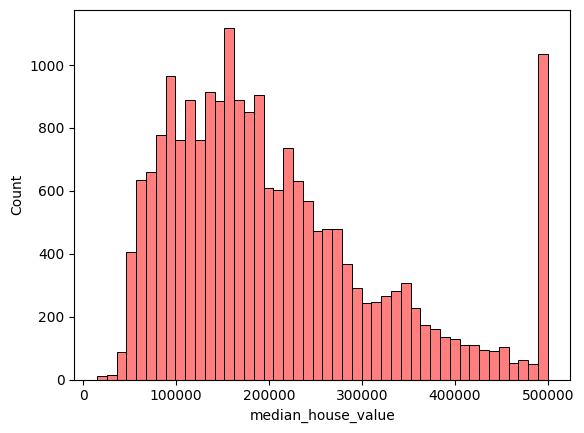

In [29]:
_=sns.histplot(all_houses["median_house_value"], alpha = 0.5, color="red")


### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

In [30]:
houses_df = all_houses.query("ocean_proximity=='<1H OCEAN' or ocean_proximity == 'INLAND'")
houses_df["ocean_proximity"]

701      <1H OCEAN
830      <1H OCEAN
859      <1H OCEAN
860      <1H OCEAN
861      <1H OCEAN
           ...    
20635       INLAND
20636       INLAND
20637       INLAND
20638       INLAND
20639       INLAND
Name: ocean_proximity, Length: 15687, dtype: object

In [31]:
# alternative: 
all_houses[(all_houses["ocean_proximity"]=='<1H OCEAN') | (all_houses["ocean_proximity"]=='INLAND')]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [33]:
houses_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [35]:
houses_df = houses_df[[
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
]]

In [36]:
houses_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`




### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* _`total_bedrooms`_ ✓
* `population`
* `households`



In [37]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [38]:
houses_df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- ***1195*** ✓
- 1295


In [40]:
houses_df["population"].median()

1195.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.



In [55]:
np.random.seed(42)
# np.random.rand()

In [65]:
n = len(houses_df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
n_train,n_val, n_test

(9413, 3137, 3137)

In [56]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [59]:
np.random.shuffle(idx)
idx

array([13881,  6502,  7347, ...,   817, 12799, 11739])

In [108]:
houses_df_shuffled = houses_df.iloc[idx]

houses_df_train = houses_df_shuffled.iloc[:n_train].copy()
houses_df_val = houses_df_shuffled.iloc[n_train:n_train+n_val].copy()
houses_df_test = houses_df_shuffled.iloc[n_train+n_val:].copy()

In [109]:
houses_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3137 entries, 9619 to 13832
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            3137 non-null   float64
 1   longitude           3137 non-null   float64
 2   housing_median_age  3137 non-null   float64
 3   total_rooms         3137 non-null   float64
 4   total_bedrooms      3112 non-null   float64
 5   population          3137 non-null   float64
 6   households          3137 non-null   float64
 7   median_income       3137 non-null   float64
 8   median_house_value  3137 non-null   float64
dtypes: float64(9)
memory usage: 245.1 KB


In [110]:
y_train_orig = houses_df_train.median_house_value.values
y_val_orig = houses_df_val.median_house_value.values
y_test_orig = houses_df_test.median_house_value.values

In [111]:
y_train = np.log1p(houses_df_train.median_house_value.values)
y_val = np.log1p(houses_df_val.median_house_value.values)
y_test = np.log1p(houses_df_test.median_house_value.values)

In [112]:
del houses_df_train['median_house_value']
del houses_df_val['median_house_value']
del houses_df_test['median_house_value']

In [113]:
# total bedrooms still has null values
houses_df_train.isna().sum()

latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        98
population             0
households             0
median_income          0
dtype: int64


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- **Both are equally good**  ✓



In [114]:
# train linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [116]:
mean_value = houses_df_train["total_bedrooms"].mean()
mean_value

541.922168545357

In [138]:
def prepare_X(df, fill_value=0):
    df["total_bedrooms"] = df["total_bedrooms"].fillna(fill_value)
    X=df.values
    return X

In [139]:
X_train_zeros = prepare_X(houses_df_train)  # default fill value: 0
w_0_zeros, w_zeros = train_linear_regression(X_train_zeros, y_train)
w_0_zeros, w_zeros

(-9.935934049466079,
 array([-2.70583681e-01, -2.58116080e-01,  1.73498386e-03, -2.77722893e-05,
         2.80671904e-04, -1.93373976e-04,  4.82873536e-04,  1.81185579e-01]))

In [140]:
X_train_mean = prepare_X(houses_df_train, fill_value = mean_value)
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
w_0_mean, w_mean

(-9.935934049466079,
 array([-2.70583681e-01, -2.58116080e-01,  1.73498386e-03, -2.77722893e-05,
         2.80671904e-04, -1.93373976e-04,  4.82873536e-04,  1.81185579e-01]))

In [145]:
X_train = X_train_zeros
w_0 , w = w_0_zeros, w_zeros

In [146]:
y_pred = w_0 + X_train.dot(w)
y_pred

array([12.41896747, 12.20580257, 11.89935413, ..., 11.43871073,
       12.0699317 , 12.43954184])

c:\Users\RobertoHernándezJimé\OneDrive - Ventagium Data Consulting\Continuous Improvement\AI\ML Zoomcamp by DTC\mlzoomcamp.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\RobertoHernándezJimé\OneDrive - Ventagium Data Consulting\Continuous Improvement\AI\ML Zoomcamp by DTC\mlzoomcamp.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RobertoHernándezJimé\OneDrive - Ventagium Data Consulting\Continuous Improvement\AI\ML Zoomcamp by DTC\mlzoomcamp.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isins

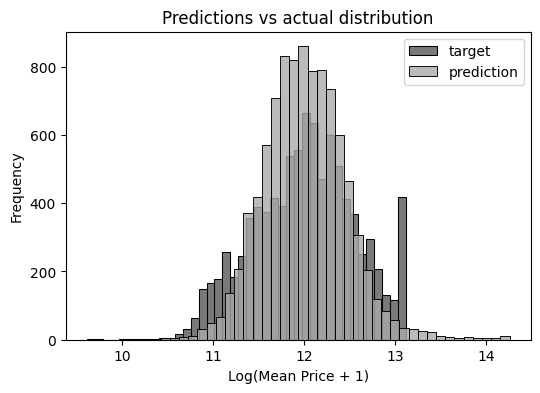

In [148]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Mean Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- ***0.001***   ✓
- 0.0001



In [149]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [150]:
rmse(y_train, y_pred)

0.3373181613590345

In [152]:
X_val = prepare_X(houses_df_val)
y_pred = w_0 + X_val.dot(w)

In [153]:
rmse(y_val, y_pred)

0.34716287521902917

In [154]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [168]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print("%8s, RMSE: " %r,round(rmse(y_val, y_pred),6))
    #print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[2], w[3]))
    

       0, RMSE:  0.347163
   1e-06, RMSE:  0.347163
  0.0001, RMSE:  0.347163
   0.001, RMSE:  0.34716
    0.01, RMSE:  0.347137
     0.1, RMSE:  0.347142
       1, RMSE:  0.349609
       5, RMSE:  0.352027
      10, RMSE:  0.352533



### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- **0.005**  ✓
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.



In [188]:
rmse_scores = []
print("%10s - %5s" %("Seed","RMSE"))
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    n = len(houses_df)
    n_val = int(0.2 * n); n_test = int(0.2 * n); n_train = n - (n_val + n_test)
    idx = np.arange(n); np.random.shuffle(idx)

    houses_df_shuffled = houses_df.iloc[idx]
    houses_df_train = houses_df_shuffled.iloc[:n_train].copy()
    houses_df_val = houses_df_shuffled.iloc[n_train:n_train+n_val].copy()
    houses_df_test = houses_df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = houses_df_train.median_house_value.values
    y_val_orig = houses_df_val.median_house_value.values
    y_test_orig = houses_df_test.median_house_value.values

    y_train = np.log1p(houses_df_train.median_house_value.values)
    y_val = np.log1p(houses_df_val.median_house_value.values)
    y_test = np.log1p(houses_df_test.median_house_value.values)

    del houses_df_train['median_house_value']
    del houses_df_val['median_house_value']
    del houses_df_test['median_house_value']
    # Fill the missing values with 0 and train a model without regularization.
    X_train = prepare_X(houses_df_train)  # defined so it fills with 0 by default
    X_val = prepare_X(houses_df_val)  # defined so it fills with 0 by default
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    tmp_rmse = rmse(y_val, y_pred)
    print("%10s -  %.4f" %(seed,tmp_rmse))
    rmse_scores.append(tmp_rmse)
    # For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 


      Seed -  RMSE
         0 -  0.3399
         1 -  0.3362
         2 -  0.3393
         3 -  0.3341
         4 -  0.3325
         5 -  0.3456
         6 -  0.3412
         7 -  0.3464
         8 -  0.3437
         9 -  0.3306


* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

In [189]:
round(np.std(rmse_scores),3)

0.005


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- **0.33**   ✓
- 0.43



In [190]:
# Split the dataset like previously, use seed 9.
np.random.seed(9); r=0.001;
n = len(houses_df)
n_val = int(0.2 * n); n_test = int(0.2 * n); n_train = n - (n_val + n_test)
idx = np.arange(n); np.random.shuffle(idx)
houses_df_shuffled = houses_df.iloc[idx]
houses_df_train = houses_df_shuffled.iloc[:n_train].copy()
houses_df_val = houses_df_shuffled.iloc[n_train:n_train+n_val].copy()
houses_df_test = houses_df_shuffled.iloc[n_train+n_val:].copy()
y_train_orig = houses_df_train.median_house_value.values
y_val_orig = houses_df_val.median_house_value.values
y_test_orig = houses_df_test.median_house_value.values
y_train = np.log1p(houses_df_train.median_house_value.values)
y_val = np.log1p(houses_df_val.median_house_value.values)
y_test = np.log1p(houses_df_test.median_house_value.values)

del houses_df_train['median_house_value']
del houses_df_val['median_house_value']
del houses_df_test['median_house_value']

# Combine train and validation datasets.
df_full_train = pd.concat([houses_df_train,houses_df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train,y_val])

# Fill the missing values with 0 and train a model with `r=0.001`. 
X_full_train = prepare_X(df_full_train)  # defined so it fills with 0 by default
X_test = prepare_X(houses_df_test)  # defined so it fills with 0 by default
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)
y_pred = w_0 + X_test.dot(w)
tmp_rmse = rmse(y_test, y_pred)
# What's the RMSE on the test dataset?
print("%10s -  %5s" %("r","RMSE"))
print("%10s -  %.4f" %(r,tmp_rmse))

         r -   RMSE
     0.001 -  0.3350



## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used



## Deadline

The deadline for submitting is September 25 (Monday), 23:00 CET. After that the form will be closed.
